# Question 5
In this notebook I solve question 5:
"Implement the $\theta$--scheme and use the linear algebra routines in Python to solve the matrix system, for varying spatial resolutions."

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

### I start by defining the ploblem parameters

In [4]:
### Parameters ###
## domain
Lp = -1
L = 1
##bonduary conditions
u_x0 = 0
u_x1 = 0

## initial condition
def initial_condition (x):

    if (x >= -1 and x <= 0):
        return 1.0 + x
    elif (x > 0 and x <= 1.0):
        return 1.0 - x
 

## equation parameters
a = 1
epsilon = 1
##run parameters
J = 40
delta_x = (L- Lp)/float(J)

delta_t = 0.0012
x_values = []
for j in range(J+1):
    x = Lp + j*delta_x
    x_values.append(x)



### Implementation of the $\Theta$--method

In [6]:
def Un1_theta_method (Un_vec, delta_t, delta_x, theta = 1/2,a = 1,epsilon = 1):
    m = len(Un_vec) - 2
    A = np.zeros((m,m))
    b = np.zeros((m,1))
    
    mu = delta_t/(delta_x*delta_x)
    nu = delta_t/delta_x
    
    ##first term k = 0, j = 1
    A[0,0] = 1.0 + (theta*nu*a) + (2.0*theta*epsilon*mu)
    A[0,1] = -theta*(nu*a + epsilon*mu)

    b[0] = (1 - (1-theta)*(nu*a + 2.0*epsilon*mu))*Un_vec[1] +  (1-theta)*(epsilon*mu)*Un_vec[0]  +  (1-theta)*( nu*a + epsilon*mu)*Un_vec[2]

    ##midle_terms k = [1,m-2] j = k + 1
    for k in range(m - 1):
        j = k+1
        A[k,k] =  1.0 + (theta*nu*a) + (2.0*theta*epsilon*mu)
        A[k,k+1] = -theta*(nu*a + epsilon*mu)
        A[k,k-1] = -theta*(epsilon*mu)
        
        b[k] =  (1 - (1-theta)*(nu*a + 2.0*epsilon*mu))*Un_vec[j] +  (1-theta)*(epsilon*mu)*Un_vec[j-1]  +  (1-theta)*( nu*a + epsilon*mu)*Un_vec[j+1]

    ##last term k = m-1, j = m
    A[m-1,m-1] = 1.0 + (theta*nu*a) + (2.0*theta*epsilon*mu)
    A[m-1,m-2] = -theta*(epsilon*mu)

    j = m
    b[m-1] =  (1 - (1-theta)*(nu*a + 2.0*epsilon*mu))*Un_vec[j] +  (1-theta)*(epsilon*mu)*Un_vec[j-1]  +  (1-theta)*( nu*a + epsilon*mu)*Un_vec[j+1]

    Un1= np.linalg.solve(A,b)
    Un1 = np.insert(Un1, 0, 0)
    Un1 = np.append(Un1, 0)
    

    return Un1

### Here I will plot the solution

First I will repeat the plot I made for the explicit scheme, to check if my method is working.

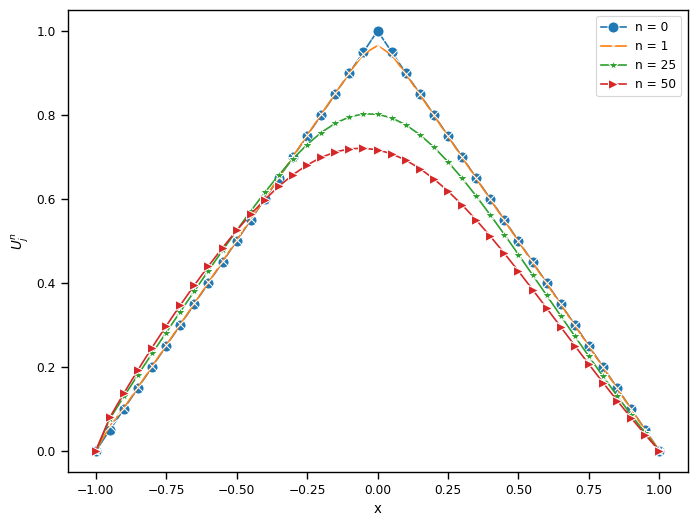

In [8]:
sns.set_context("paper")

h_plot = 1
v_plot = 1

fig, ax = plt.subplots(v_plot, h_plot,  figsize=(8, 6))

time_steps = [0,1,25,50]
markers_vec = ['o', 'x', "*", ">", "+"]
### time step t = 0 ###   
n=0

#calculate the initial condition U0
U0 = []
x_values = [] 
for j in range(J+1): 
    x = Lp + j*delta_x
    x_values.append(x)
    U0.append(initial_condition (x))   
#ploting the IC
sns.lineplot(x=x_values, y=U0, #color = colours[9],
             marker=markers_vec[time_steps.index(0)], markersize = 8, label = f"n = {n}")
# ax.set_title(r"$\Delta t$ = " + str(delta_t))
ax.set_xlabel("x")
## time step t = delta_t ###
n= 1
#here I calculate the first row of results for n = 1 (U1)
Un = Un1_theta_method (U0, delta_t, delta_x)
#ploting the approximation for U1

sns.lineplot(x=x_values, y=Un, 
             marker=markers_vec[time_steps.index(n)], markersize = 10,
             label = f"n = {n}") 


for N in time_steps[2:]:
    while n < N:
        n = n+1
        Un1 = Un1_theta_method (Un, delta_t, delta_x)
        Un = Un1
        # here I plot the results for t =n * delta_t
    sns.lineplot(x=x_values, y=Un1, 
                 marker=markers_vec[time_steps.index(n)], markersize = 7,
                     label = f"n = {n}") 
ax.set_ylabel(r"$U_j^{n}$")

plt.savefig('images/Question5-theta_method_to_eq_1.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'

Then I test diferent space resolution

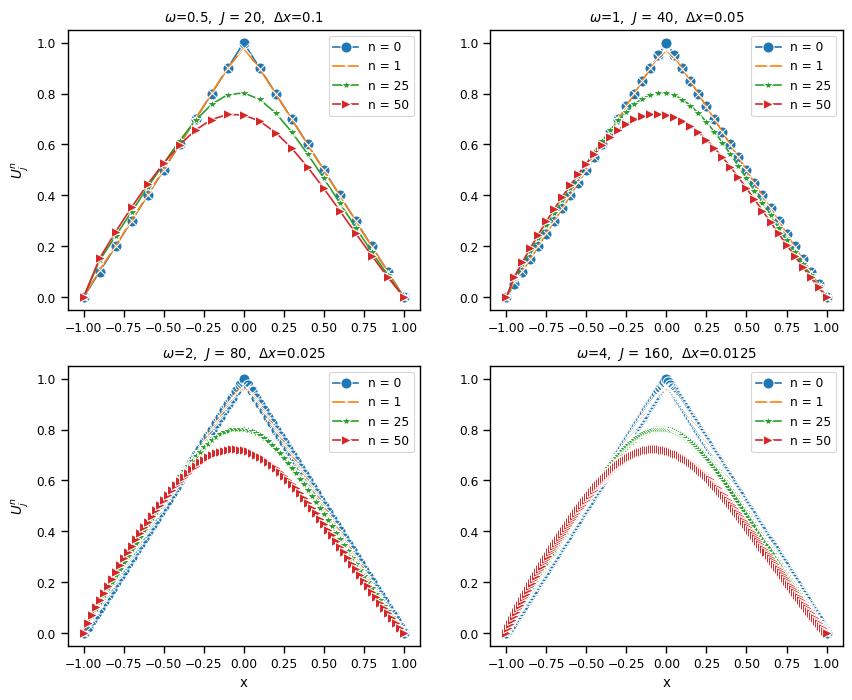

In [10]:
sns.set_context("paper")

h_plot = 2
v_plot = 2

fig, ax = plt.subplots(v_plot, h_plot, figsize=(10, 8))

time_steps = [0, 1, 25, 50]
markers_vec = ['o', 'x', "*", ">", "+"]

omega_vec = [0.5,1,2,4] # omega stand for the spatial resolutions fraction, so if we have delta_x = (L-Lp)/J, then  delta_x/omega = (L-Lp)/(J*omega)
w = 0

for a in range (v_plot):
    for i in range(h_plot):
        J_new = int(omega_vec[w]*float(J)) # new J
        delta_x_n = (L- Lp)/float(J_new) #new deltax
         
        n=0
        #calculate the initial condition U0
        x_values = []
        U0 = []
        for j in range(J_new+1): 
            x = Lp + j*delta_x_n
            x_values.append(x)
            U0.append(initial_condition (x)) 
        #ploting the IC
        sns.lineplot(x=x_values, y=U0, #color = colours[9],
                     marker=markers_vec[time_steps.index(0)], markersize = 8, label = f"n = {n}", 
                    ax = ax[a,i])
        ax[a,i].set_title(r"$\omega$="+str(omega_vec[w])  + r",  $J$ = " + str(J_new)+r",  $\Delta x$="+str(delta_x_n))
        if(i == 0):
            ax[a,i].set_ylabel(r"$U_j^{n}$")
        if(a == v_plot-1):
            ax[a,i].set_xlabel("x")
            
        # ax.set_xlabel("x")
        ## time step t = delta_t ###
        n= 1
        #here I calculate the first row of results for n = 1 (U1)
        Un = Un1_theta_method (U0, delta_t, delta_x_n)
        #ploting the approximation for U1
        sns.lineplot(x=x_values, y=Un, 
                     marker=markers_vec[time_steps.index(n)], markersize = 10,
                     label = f"n = {n}",
                    ax = ax[a,i]) 
        for N in time_steps[2:]:
            while n < N:
                n = n+1
                Un1 = Un1_theta_method (Un, delta_t, delta_x_n)
                Un = Un1
            # here I plot the results for t =n * delta_t
            sns.lineplot(x=x_values, y=Un1, 
                         marker=markers_vec[time_steps.index(n)], markersize = 7,
                         label = f"n = {n}",
                        ax = ax[a,i]) 
        w = w +1

 
plt.savefig('images/Question5-different_delta-x.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'